<a href="https://colab.research.google.com/github/onishchenkoar/dungeons-and-dragons-and-probabilities/blob/main/Vanishing_advantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanishing advantage

Sometimes, advantage to hit depends on target making a saving throw. Since the result of the saving throw is random, having an advantage is a probabilistic event, thus affecting a distribution of the d20 roll for an attack.

## Some probability theory

Let $P(d20=x)$ be a probability of rolling $x$ with a d20 die. Because you don't know whether the roll is straight or at advantage, there are two components to it: probability of rolling $x$ with a straight roll and probability of rolling $x$ at advantage.

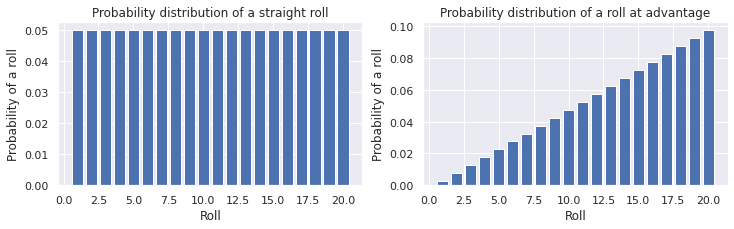

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()


range20 = np.arange(1, 21)
d20_adv_dist = np.array([(2*i - 1) / 400 for i in range(1, 21)])
d20_straight_dist = np.array([0.05] * 20)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axs[0].bar(range20, d20_straight_dist)
axs[0].set_title('Probability distribution of a straight roll')
axs[0].set_xlabel('Roll')
axs[0].set_ylabel('Probability of a roll')

axs[1].bar(range20, d20_adv_dist)
axs[1].set_title('Probability distribution of a roll at advantage')
axs[1].set_xlabel('Roll')
axs[1].set_ylabel('Probability of a roll')
plt.show()

Thus, it gives the sum:

$$ \begin{aligned}
     P(d20=x) &= P(d20=x|ADV)P(ADV) \\
              &+ P(d20=x|STR)P(STR), 
   \end{aligned}
$$
where: 
* $P(d20=x|ADV)$ &mdash; probability of rolling $x$ at advantage;
* $P(d20=x|STR)$ &mdash; probability of rolling $x$ with a straight roll;
* $P(ADV)$ &mdash; probability of having advantage on a roll (the target fail its save);
* $P(STR)$ &mdash; probability of having a straight roll (the target succeeds at its save). 

$$ P(ADV) = P(\lnot SAVE); \: P(STR) = P(SAVE), $$

$$ \begin{aligned}
     P(d20=x) &= P(d20=x|ADV)P(\lnot SAVE) \\
              &+ P(d20=x|STR)P(SAVE)
   \end{aligned}
$$

Because $P(SAVE)$ and $P(\lnot SAVE)$ are scalar multipliers, you can view the formula above as a weighted sum of two distributions.

## Probabilities in multiple rounds

Often, the target has to contest attacker's advantage at each new round of combat. Thus, the more rounds passes, the less likely the attacker is to have advantage.

If the probability of failing a saving throw in each round is $p$, the probability of keeping advantage in $i$-th round is $P(\lnot SAVE) = p^i$; the probability of having a straight roll is $P(SAVE) = 1 - p^i$.

Below is a function that plots changes in probability distribution of d20 rolls changes in 9 consecutive rounds.

In [2]:
def plot_rounds(p_no_save):
  p_adv = p_no_save
  p_straight = 1 - p_adv

  fig, axs = plt.subplots(nrows=3, ncols=3,
                          figsize=(12, 8),
                          sharey=True)
  axs = axs.flatten()
  for i, ax in enumerate(axs, 1):
    xk = np.arange(1, 21)
    pk = d20_adv_dist*p_adv + d20_straight_dist*p_straight
    print('Expected value for round %d: %.2f' % (i, np.dot(xk, pk)))
    
    ax.bar(xk, pk, snap=False)
    ax.hlines(0.05, 0.5, 20.5, label='Straight roll (ref.)')
    ax.plot([1, 20], [1/400, 39/400], label='Advantage (ref.)')
    ax.legend()
    ax.set_title(f'Round {i}')
    ax.set_ylabel('Probability')
    ax.set_xticks(np.arange(1, 21, 2))
    p_adv *= p_no_save
    p_straight = 1 - p_adv
  plt.tight_layout()
  plt.show()

As an example, let's plot a sequence of distributions if a target has to make saving throws against difficulty class of 17 with a bonus of 6 &mdash; this way there is a 50% chance of either save or fail. For reference, I plot lines denoting distributions for a straight roll and a roll at advantage.

Expected value for round 1: 12.16
Expected value for round 2: 11.33
Expected value for round 3: 10.92
Expected value for round 4: 10.71
Expected value for round 5: 10.60
Expected value for round 6: 10.55
Expected value for round 7: 10.53
Expected value for round 8: 10.51
Expected value for round 9: 10.51


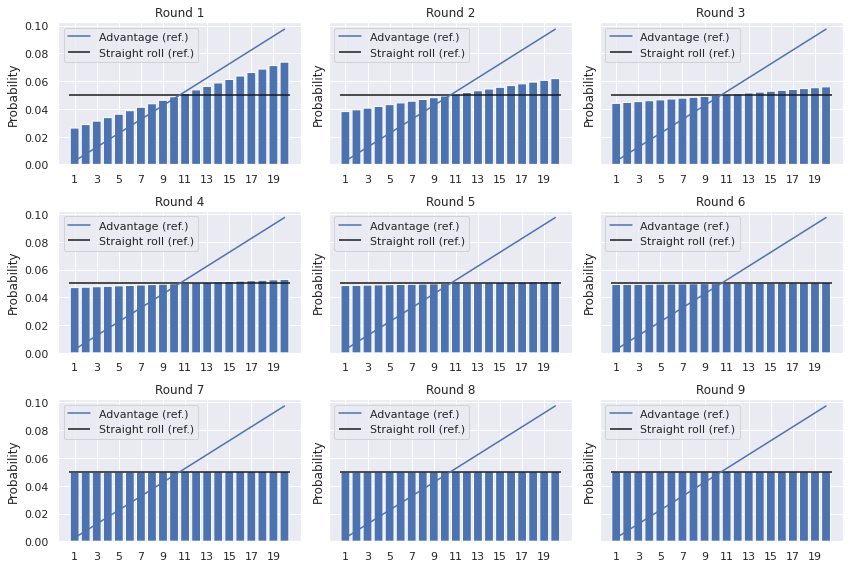

In [3]:
# Probability of a failed save 0.5
plot_rounds(0.5)

We see that expected value of the roll drops really quickly (expected value of a roll at advantage is 13.825; expected value of a straight roll is 10.5).

Let's see how it compares against a case where target has to make a save against the same difficulty class (17) but with 0 bonus; this gives 80% probability of failing a save.

Expected value for round 1: 13.16
Expected value for round 2: 12.63
Expected value for round 3: 12.20
Expected value for round 4: 11.86
Expected value for round 5: 11.59
Expected value for round 6: 11.37
Expected value for round 7: 11.20
Expected value for round 8: 11.06
Expected value for round 9: 10.95


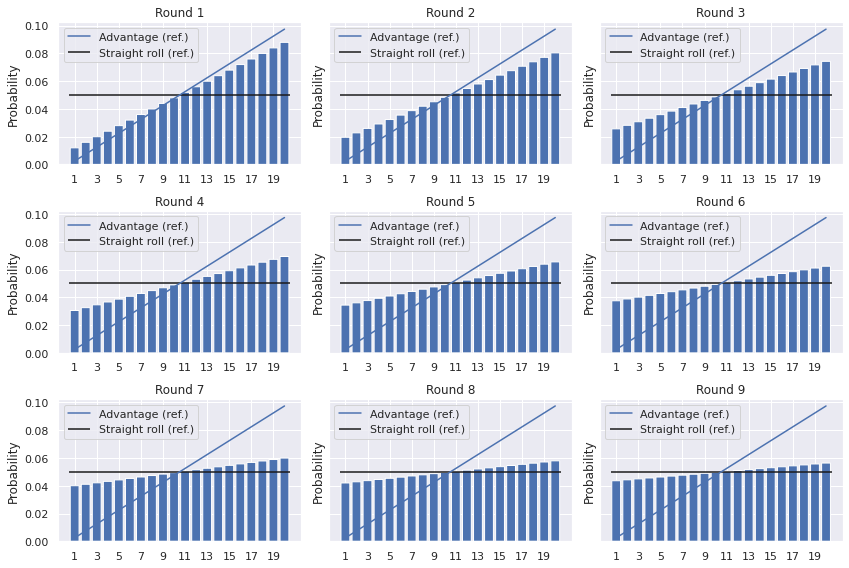

In [4]:
# Probability of a failed save 0.8
plot_rounds(0.8)

This gives a little bit better chances of rolling higher numbers. Still, the drop to a straight roll is quite quick.

## Conclusion

Advantage can be probabilistic. If saving throws are made repeatedly, the distribution fades to straight roll distribution rather fast.